# Advanced SPLOM Chart

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Altair-Library-and-Iris-Data-Set" data-toc-modified-id="Import-Altair-Library-and-Iris-Data-Set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Altair Library and Iris Data Set</a></span></li><li><span><a href="#Add-Color-Encodings-for-Different-Species" data-toc-modified-id="Add-Color-Encodings-for-Different-Species-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Add Color Encodings for Different Species</a></span></li><li><span><a href="#Verbose-Form-of-SPLOM" data-toc-modified-id="Verbose-Form-of-SPLOM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Verbose Form of SPLOM</a></span></li><li><span><a href="#Rescale-the-X-and-Y-Axis" data-toc-modified-id="Rescale-the-X-and-Y-Axis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Rescale the X and Y Axis</a></span></li><li><span><a href="#Show-Axis-Labels-Only-at-the-Left-and-Bottom-Scatter-Plots-and-Hide-Them-for-the-Rest" data-toc-modified-id="Show-Axis-Labels-Only-at-the-Left-and-Bottom-Scatter-Plots-and-Hide-Them-for-the-Rest-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Show Axis Labels Only at the Left and Bottom Scatter Plots and Hide Them for the Rest</a></span></li><li><span><a href="#Integrate-Histograms-in-to-SPLOM-for-a-Variable-Plotted-Against-Itself" data-toc-modified-id="Integrate-Histograms-in-to-SPLOM-for-a-Variable-Plotted-Against-Itself-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Integrate Histograms in to SPLOM for a Variable Plotted Against Itself</a></span></li></ul></div>

It looks like we have already gotten a basic SPLOM chart. However, we can further decorate this visulization by the following enhancements:
- add color encodings for different species
- verbose form of SPLOM
- rescale the x and y axis
- show axis labels only at the left and bottom scatter plots and hide them for the rest
- integrate histograms in to SPLOM for a variable plotted against itself

## Import Altair Library and Iris Data Set

In [1]:
# import altair
import altair as alt

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

# import iris data set
from vega_datasets import data

iris = data.iris()
iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# create a list of encodings
encodings = list(iris.columns[:-1])
encodings

['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']

## Add Color Encodings for Different Species

Firstly, we can separate the data points for different species by assigning them different colors. This can be achieved simply by adding a `color` encoding to the chart.

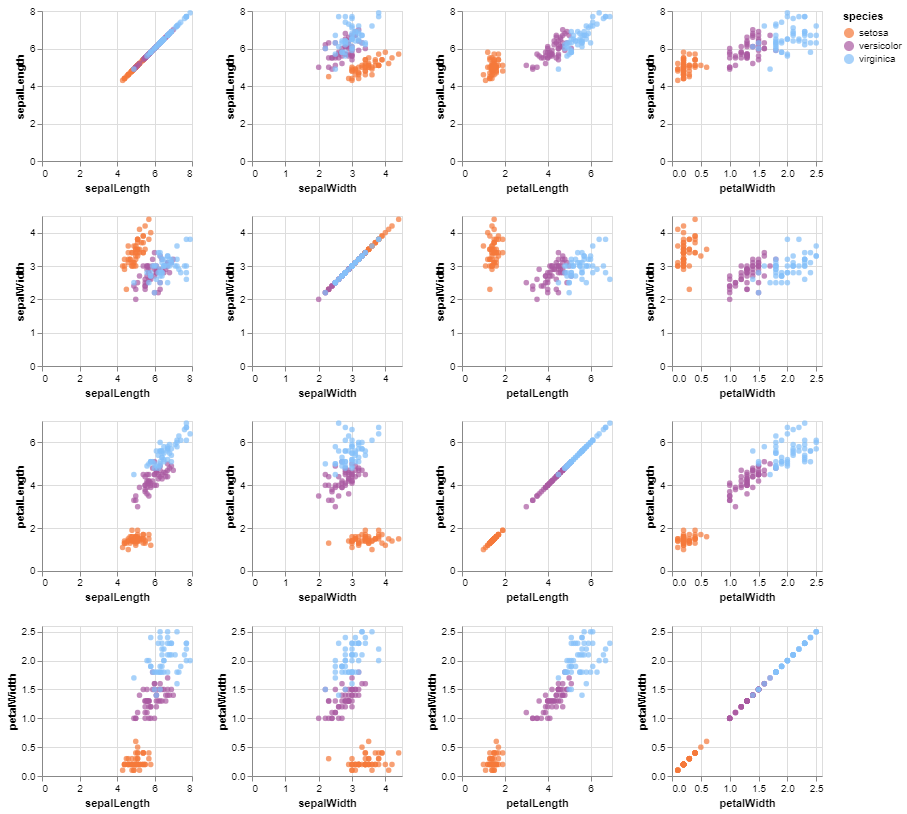

In [3]:
alt.Chart(iris).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'), # repeat columns
    alt.Y(alt.repeat("row"), type='quantitative'), # repeat rows
    color=alt.Color('species:N', # set species as the color encoding
                    scale=alt.Scale(range=['#F5793A', '#A95AA1', '#85C0F9'])) # specify the hex color codes
).properties( # set width and height of the visualization
    width=150,
    height=150
).repeat( # repeatedly draw rows and columns of scatter plots
    row=encodings,
    column=encodings
)

## Verbose Form of SPLOM

In order to achieve the rest of the customizations, let's recreate the SPLOM chart in a more verbose way

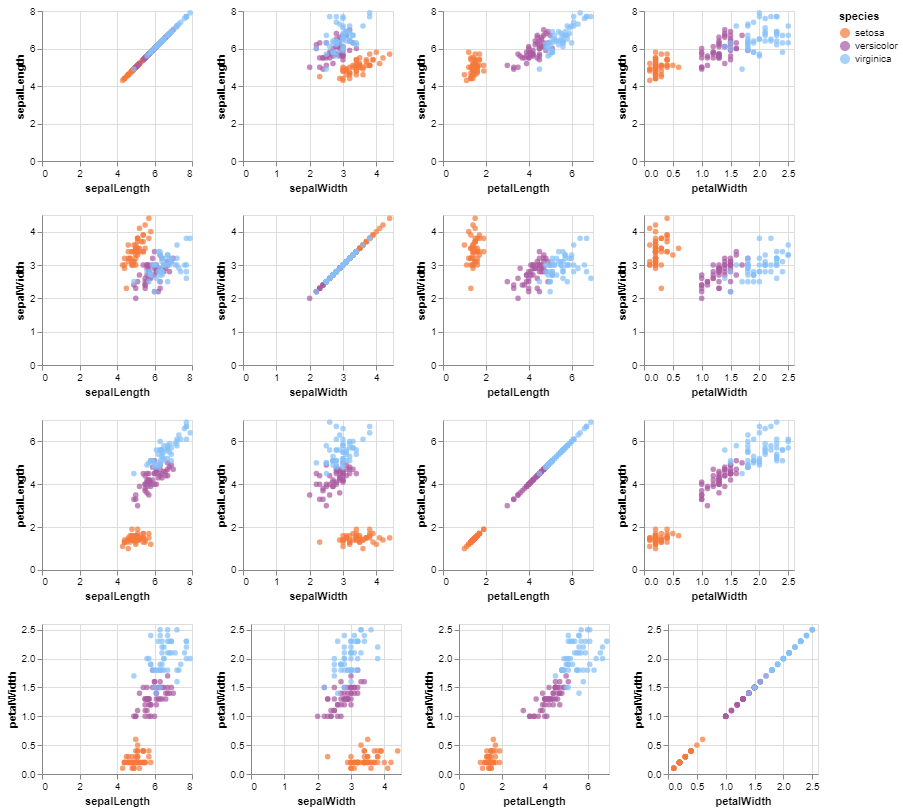

In [4]:
# base chart
base = alt.Chart(data=iris).encode(
    color=alt.Color('species:N', # set species as the color encoding
                    scale=alt.Scale(range=['#F5793A', '#A95AA1', '#85C0F9'])) # specify the hex color codes
).properties( # set width and height of the visualization
    width=150,
    height=150
)

splom = alt.vconcat() # concatenate charts vertically

for y_encoding in encodings: # iterate each row of the matrix
    row = alt.hconcat() # concatenate charts horizontally
    for x_encoding in encodings: # iterate each column of the matrix
        # create a scatter plot with current x and y encodings
        chart = base.mark_circle().encode(x=x_encoding, y=y_encoding)
        # add the charts horizontally to a row 
        row |=  chart
    
    splom &= row # add rows vertically to the SPLOM chart

splom # show the final SPLOM chart

We first create a base chart with common configurations (data source, color encoding and chart height and width). Then we iterate over the encoding list twice. Once for the y encodings and the second time for the x encodings. Within the loop we create individual scatter plots for each pair of x and y encodings and concatenate these scatter plots together. The result is exactly the same as we called the `repeat` method. However, this approach would give us more freedom in adjusting the layout of individual scatter plots

## Rescale the X and Y Axis

It can be seen that Altair defaults to draw the x and y axis from (0, 0) in all scatter plots. This might not be the most appropriate choice when our data points are all far away from (0,0). We can neglect this default setting and allow our axex to adjust dynamically according to the data range.

To rescale the x and y axis, we add the line `scale=alt.Scale(zero=False)` to the x and y encodings. This ensures our x and y axes are not necessarily starting from 0. Instead, Altair can derive the best range of scale for x and y axis for us such that the data points make full use of the chart space.

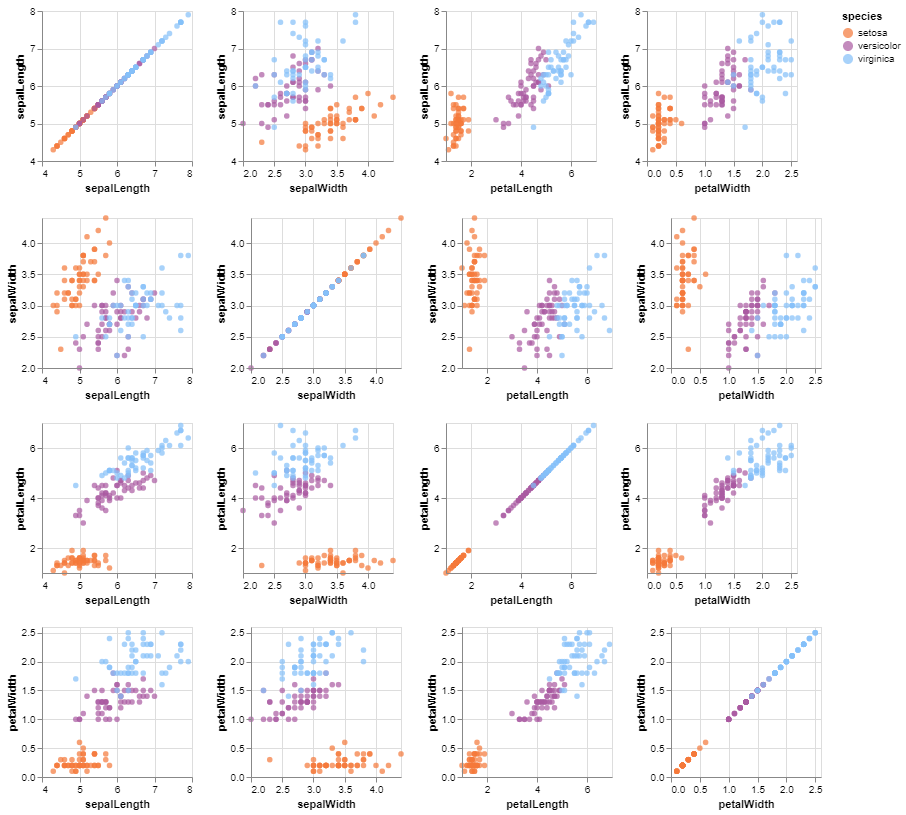

In [5]:
# base chart
base = alt.Chart(data=iris).encode(
    color=alt.Color('species:N', # set species as the color encoding
                    scale=alt.Scale(range=['#F5793A', '#A95AA1', '#85C0F9'])) # specify the hex color codes
).properties( # set width and height of the visualization
    width=150,
    height=150
)

splom = alt.vconcat() # concatenate charts vertically

for y_encoding in encodings: # iterate each row of the matrix
    row = alt.hconcat() # concatenate charts horizontally
    for x_encoding in encodings: # iterate each column of the matrix
        # create a scatter plot with current x and y encodings
        chart = base.mark_circle().encode(x=alt.X(x_encoding, 
                                                  scale=alt.Scale(zero=False) # x axis is not starting from 0 by default
                                                 ), 
                                          y=alt.Y(y_encoding, 
                                                  scale=alt.Scale(zero=False) # y axis is not starting from 0 by default
                                                 )  
                                         )
        # add the charts horizontally to a row
        row |= chart
        
    splom &= row # add rows vertically to the SPLOM chart

splom # show the final SPLOM chart

## Show Axis Labels Only at the Left and Bottom Scatter Plots and Hide Them for the Rest

Next, we can see that axis labels are repeated for each row and column in the SPLOM chart. We can clean this up a bit by showing the y axis labels only for the left most charts and shwoing the x axis lables only for the bottom charts. All the other axis lables will be removed.

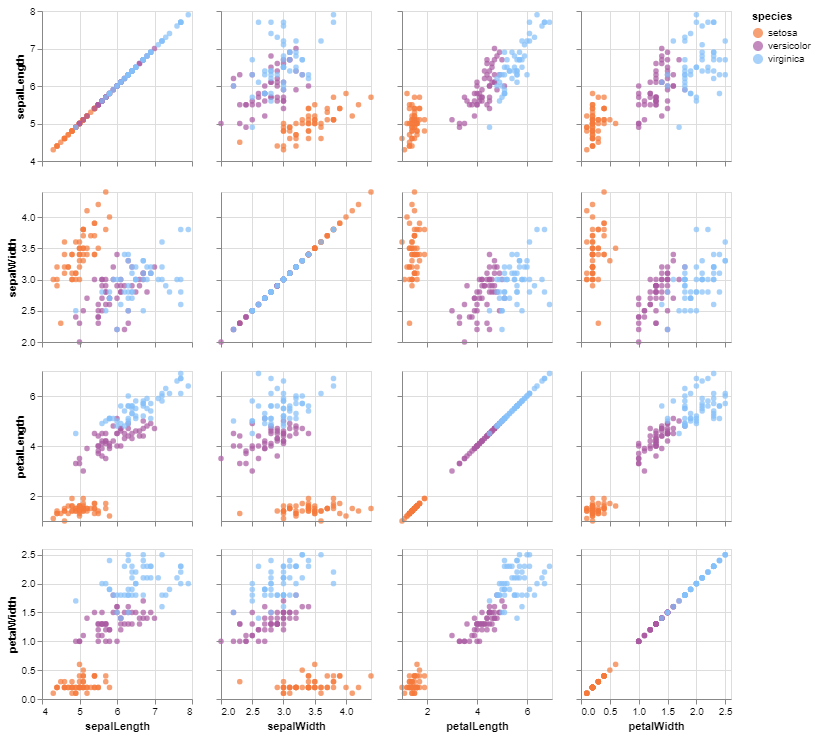

In [6]:
# base chart
base = alt.Chart(data=iris).encode(
    color=alt.Color('species:N', # set species as the color encoding
                    scale=alt.Scale(range=['#F5793A', '#A95AA1', '#85C0F9'])) # specify the hex color codes
).properties( # set width and height of the visualization
    width=150,
    height=150
)

splom = alt.vconcat() # concatenate charts vertically

for y_encoding in encodings: # iterate each row of the matrix
    row = alt.hconcat() # concatenate charts horizontally
    for x_encoding in encodings: # iterate each column of the matrix
        # for charts not in the first column or last row of the matrix, diable both x and y axis labels
        if x_encoding in encodings[1:] and y_encoding in encodings[:-1]:
            # create a scatter plot with current x and y encodings
            chart = base.mark_circle().encode(x=alt.X(x_encoding, 
                                                      scale=alt.Scale(zero=False), # x axis is not starting from 0 by defaul
                                                      axis=alt.Axis(labels=False, title=None) # disable the axis label and title
                                                     ), 
                                              y=alt.Y(y_encoding, 
                                                      scale=alt.Scale(zero=False), # y axis is not starting from 0 by default
                                                      axis=alt.Axis(labels=False, title=None) # disable the axis label and title
                                                     )
                                             )            
        # for charts in the last row of the matrix, only disable y axis labels
        elif x_encoding in encodings[1:]:
            # create a scatter plot with current x and y encodings
            chart = base.mark_circle().encode(x=alt.X(x_encoding, 
                                                      scale=alt.Scale(zero=False) # x axis is not starting from 0 by default
                                                     ), 
                                              y=alt.Y(y_encoding, 
                                                      scale=alt.Scale(zero=False), # y axis is not starting from 0 by default
                                                      axis=alt.Axis(labels=False, title=None) # disable the axis label and title
                                                     ) 
                                             )
        # for charts in the first column of the matrix, only disable x axis labels
        elif y_encoding in encodings[:-1]:
            # create a scatter plot with current x and y encodings
            chart = base.mark_circle().encode(x=alt.X(x_encoding, 
                                                      scale=alt.Scale(zero=False), # x axis is not starting from 0 by default
                                                      axis=alt.Axis(labels=False, title=None) # disable the axis label and title
                                                     ), 
                                              y=alt.Y(y_encoding, 
                                                      scale=alt.Scale(zero=False) # y axis is not starting from 0 by default
                                                     ) 
                                             )
        # lastly, for chart at the left bottom, show both x and y axis labels
        else:
            chart = base.mark_circle().encode(x=alt.X(x_encoding, 
                                                      scale=alt.Scale(zero=False) # x axis is not starting from 0 by default
                                                     ), 
                                              y=alt.Y(y_encoding, 
                                                      scale=alt.Scale(zero=False) # y axis is not starting from 0 by default
                                                     )
                                             )            
        # add the charts horizontally to a row
        row |= chart
        
    splom &= row # add rows vertically to the SPLOM chart
    
splom # show the final SPLOM chart

We set the axis labels by the following conditions:
1. Charts not in the first column and last row of the matrix -> disable both x and y axis labels
2. Charts in the last row of the matrix -> only disable y axis labels
3. Charts in the first column of the matrix -> only disable x axis labels
4. Charts in the left bottom of the matrix -> enable both x and y axis labels

## Integrate Histograms in to SPLOM for a Variable Plotted Against Itself

Lastly, we can see that scatter plots along the diagonal line are in fact the variable plotting against itself. This does not reveal much information about the variable. Instead, we can turn these scatter plots into histograms to count the occurrence frequencies.

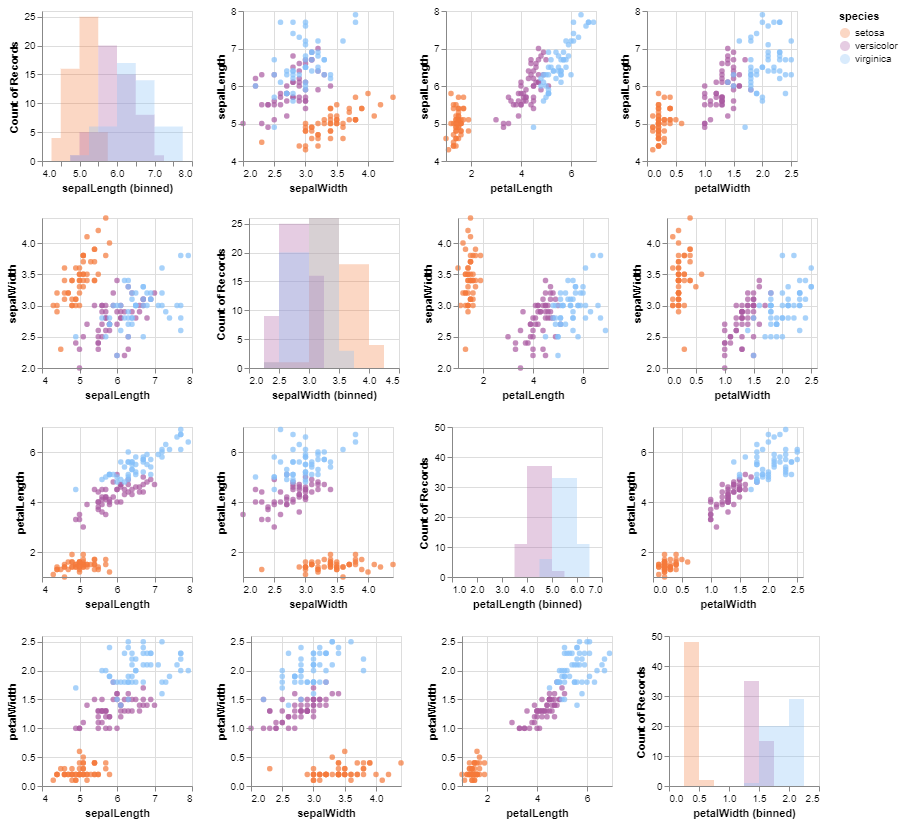

In [7]:
# base chart
base = alt.Chart(data=iris).encode(
    color=alt.Color('species:N', # set species as the color encoding
                    scale=alt.Scale(range=['#F5793A', '#A95AA1', '#85C0F9'])) # specify the hex color codes
).properties( # set width and height of the visualization
    width=150,
    height=150
)

splom = alt.vconcat() # concatenate charts vertically

for y_encoding in encodings: # iterate each row of the matrix
    row = alt.hconcat() # concatenate charts horizontally
    for x_encoding in encodings: # iterate each column of the matrix
        # for diagonal charts, plot a histogram
        if x_encoding == y_encoding:
            chart = base.mark_area(opacity=0.3, # make the bars a bit transparent so they can be viewed when stacked together
                                   interpolate='step'
                                  ).encode(x=alt.X(x_encoding, 
                                                   bin=True), # bin the x values
                                           y=alt.Y('count()', # count frequencies of each bin
                                                   stack=None) # do not stack the bars
                                          ) 
        # for the other charts, plot a scatter plot
        else:
            chart = base.mark_circle().encode(x=alt.X(x_encoding, 
                                                      scale=alt.Scale(zero=False) # x axis is not starting from 0 by default
                                                     ), 
                                              y=alt.Y(y_encoding, 
                                                      scale=alt.Scale(zero=False) # y axis is not starting from 0 by default
                                                     )
                                             )
        # add the charts horizontally to a row
        row |= chart
        
    splom &= row # add rows vertically to the SPLOM chart
    
splom # show the final SPLOM chart

Note here we did not remove axis labels for any chart. This is because the histograms and scatter plots do not share the same axis label and scale. It would be misleading if we only display axis labels for charts in the first column and last row of the matrix.

In [8]:
%load_ext watermark

In [9]:
print('Dependencies: \n')
%watermark -v -p altair

Dependencies: 

CPython 3.7.5
IPython 7.9.0

altair 3.2.0


---
**Author**: Lin Di

Source code for this tutorial can be found in [GitHub](https://github.com/datascientistlin/MADS/tree/master/SIADS521/Assignment2) alongside a static HTML version for easy readability.

---

**This notebook demonstrates:**

---
**Rule 2: Document the process, not just the results.**
This tutorial has documented the detailed steps to arrive at each visulizations. Each line of code is explained with a comment for its purpose. There are different enhancements to the SPLOM chart introduced. Each enhancement is built on top of the others. In a step-by-step manner, readers would be able to grasp the variations in different implementations

**Rule 3: Use cell divisions to make steps clear.**
Each code cell is dedicated to accomplish the task of creating one visualization. They are kept short to avoid messiness in reading. Each code is also preceded with a markdown cell to describe the visualization to be implemented. Table of content is enabled in this notebook for easy access of different segments of the document.

**Rule 5: Record dependencies.**
At the end of the document, Python and Altair library version is specified for others to re-produce the same visualizations

**Rule 9: Design your notebooks to be read, run, and explored.**
The notebook is uploaded to GitHub for others to access. In addtion, a static HTML version of the notebook is created for additional support of readability

---